## **Data Cleaning**

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import re
from sklearn.cluster import KMeans as sk_KMeans, DBSCAN as sk_DBSCAN
from sklearn.svm import SVC, LinearSVC

N = 17255904 #Cavin's N number for random seed

In [2]:
from Data_cleaning import *

columns=['Name', 'Features', 'Location', 'Price', "Seller", "Auction_Type", "Date"] 
data_files = os.listdir("Data")
data_files.remove('.DS_Store')
data_path = "Data/"
print(data_files)

['Porsche_911.csv']


In [3]:
df_file = data_path + "Porsche_911.csv"
df = pd.read_csv(df_file, names=columns, header=None)

print("Raw Data")
print(df.shape)
data = clean_features(df)
data = clean_date(data)
data = clean_prices(data)
data = clean_name(data)
data = binarize_auctiontype(data)
data = binarize_transmission(data)
data = binarize_drive_side(data)
data.head(50)
print(data.isnull().sum())

data = data[data['Location'].notna()]
data = data[data['Price'].notna()]
data = data[data['Seller'].notna()]
data = data[data['Mileage'].notna()]
data = data[data['Condition'].notna()]
data = data[data['Date'].notna()]
data = data[data['DriveSide'].notna()]
data = data[data['Transmission_type'].notna()]
data = data.drop(columns=['NameOfModel'])
print("\nPost Cleaning")
print(data.shape)
print(data.isnull().sum())
data = clean_location(data)
data = get_age(data)
data = data[data["Condition"].isin(["Modified", "Restored-Original", "Restomod & Custom", "Original & Highly Original"])]

Raw Data
(12725, 7)
Location              220
Price                 658
Seller                  2
Date                    2
Mileage              2473
Condition            5758
NameOfModel             0
YearOfManufacture       0
Cabriolet               0
Coupe                   0
GT                      0
AuctionType             2
Transmission_type    1413
DriveSide            4071
dtype: int64

Post Cleaning
(5288, 13)
Location             0
Price                0
Seller               0
Date                 0
Mileage              0
Condition            0
YearOfManufacture    0
Cabriolet            0
Coupe                0
GT                   0
AuctionType          0
Transmission_type    0
DriveSide            0
dtype: int64


In [4]:
class PCA():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and
    maximizing the variance along each feature axis.
    """
    def _init__(self):
        self.eigenValues=None
        self.components=None
        
    def transform(self, X, n_components):
        """ Fit the dataset to the number of principal components specified in the
        constructor and return the transformed dataset """
        covariance_matrix = self.calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1] # [3, 2, 1] ---> [2, 1, 0] --> [0, 1, 2]
        print(eigenvalues)
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
        
        # Set the object variables
        self.eigenValues=eigenvalues
        self.components=eigenvectors

        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed
    
    def calculate_covariance_matrix(self, X, Y=None):
        """ Calculate the covariance matrix for the dataset X """
        if Y is None:
            Y = X
        n_samples = np.shape(X)[0]
        covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

        return np.array(covariance_matrix, dtype=float)

In [5]:
categorical_columns = ["Country", "Condition", "Seller"]
data_copy = data.copy()
for column in categorical_columns:
    if column not in data_copy.columns:
      continue
    le = LabelEncoder()
    data_copy[column] = le.fit_transform(data_copy[column].astype(str))


data_copy['Condition'].unique()

array([3, 1, 0, 2])

Cabriolet
[3.11655551 1.9550413  1.50838531 0.00315289 1.26742971 1.1962679
 0.25751424 0.37840793 0.43671995 0.54954927 0.89958133 0.69871308
 0.73522212]
Cabriolet


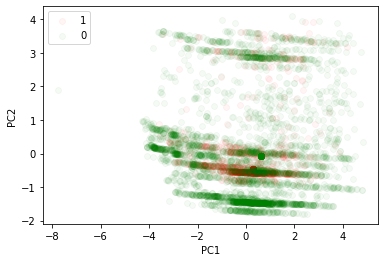

Coupe
[3.11655551 1.9550413  1.50838531 0.00315289 1.26742971 1.1962679
 0.25751424 0.37840793 0.43671995 0.54954927 0.89958133 0.69871308
 0.73522212]
Coupe


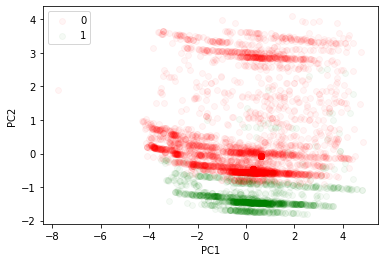

GT
[3.11655551 1.9550413  1.50838531 0.00315289 1.26742971 1.1962679
 0.25751424 0.37840793 0.43671995 0.54954927 0.89958133 0.69871308
 0.73522212]
GT


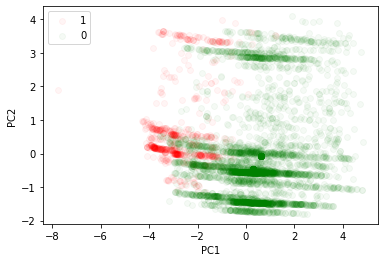

Transmission_type
[3.11655551 1.9550413  1.50838531 0.00315289 1.26742971 1.1962679
 0.25751424 0.37840793 0.43671995 0.54954927 0.89958133 0.69871308
 0.73522212]
Transmission_type


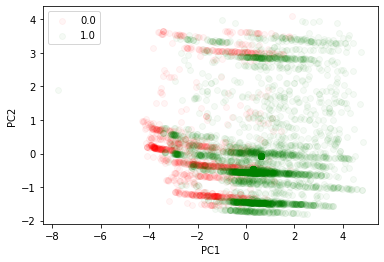

DriveSide
[3.11655551 1.9550413  1.50838531 0.00315289 1.26742971 1.1962679
 0.25751424 0.37840793 0.43671995 0.54954927 0.89958133 0.69871308
 0.73522212]
DriveSide


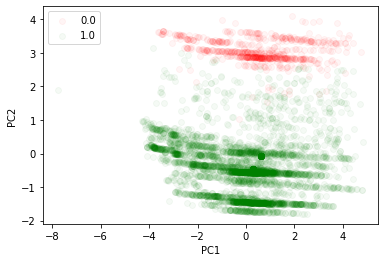

Condition
[3.11655551 1.9550413  1.50838531 0.00315289 1.26742971 1.1962679
 0.25751424 0.37840793 0.43671995 0.54954927 0.89958133 0.69871308
 0.73522212]
Condition


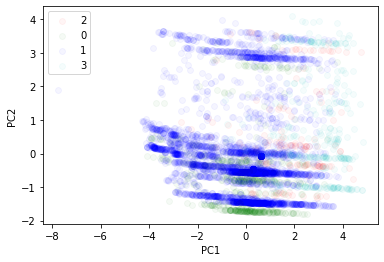

Country
[3.11655551 1.9550413  1.50838531 0.00315289 1.26742971 1.1962679
 0.25751424 0.37840793 0.43671995 0.54954927 0.89958133 0.69871308
 0.73522212]
Country


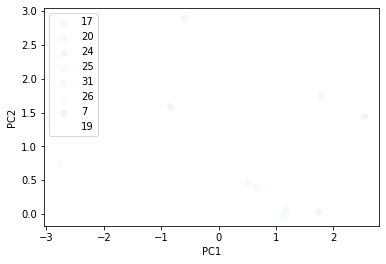

Seller
[3.11655551 1.9550413  1.50838531 0.00315289 1.26742971 1.1962679
 0.25751424 0.37840793 0.43671995 0.54954927 0.89958133 0.69871308
 0.73522212]
Seller


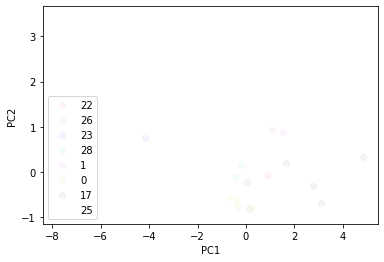

In [6]:
all_columns = ['Cabriolet', 'Coupe', 'GT', 'Transmission_type', 'DriveSide','Condition', 'Country', 'Seller']
for column_to_check in all_columns:
    print(column_to_check)
    #selected_columns = ['Price', 'Mileage', 'Cabriolet', 'Coupe', 'GT', 'AuctionType', 'Transmission_type', 'DriveSide', 'Age']
    selected_columns = data_copy.columns
    try:
        selected_columns.remove(column_to_check)
    except:
        pass
    new_data = data_copy[selected_columns].to_numpy()
    np.shape(new_data)
    pca=PCA()
    X_transformed=pca.transform(StandardScaler().fit_transform(new_data), 2)
    print(column_to_check)
    np.shape(X_transformed)

    target_names = list(data_copy[column_to_check].unique())
#     target_names = [4, 7, 2, 5, 3, 0, 1, 6]
    target_names = target_names[::-1]
    target_ids = range(len(target_names))
    y = data_copy[column_to_check].to_numpy()
    for i, c, label in zip(target_names, 'rgbcmykw', target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], c=c, label=label, alpha = 0.04)
#         ax.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], X_transformed[y==i,2], c=c, label=label)
        #ax.view_init(elev=20., azim=45)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

## **Coupe**

Coupe
[3.11655551 1.9550413  1.50838531 0.00315289 1.26742971 1.1962679
 0.25751424 0.37840793 0.43671995 0.54954927 0.89958133 0.69871308
 0.73522212]
Coupe


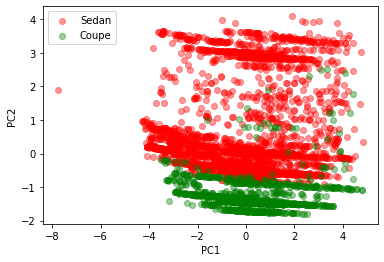

In [7]:
column_to_check = 'Coupe'
print(column_to_check)
#selected_columns = ['Price', 'Mileage', 'Cabriolet', 'Coupe', 'GT', 'AuctionType', 'Transmission_type', 'DriveSide', 'Age']
selected_columns = data_copy.columns
try:
    selected_columns.remove(column_to_check)
except:
    pass
new_data = data_copy[selected_columns].to_numpy()
np.shape(new_data)
pca=PCA()
X_transformed=pca.transform(StandardScaler().fit_transform(new_data), 2)
print(column_to_check)
np.shape(X_transformed)

target_names = list(data_copy[column_to_check].unique())
target_names = target_names[::-1]
labels = ['Sedan', 'Coupe']
target_ids = range(len(target_names))
y = data_copy[column_to_check].to_numpy()
for i, c, label in zip(target_names, 'rgbcmykw', labels):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], c=c, label=label, alpha = 0.4)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [8]:
clf = SVC(kernel="rbf")
clf.fit(X_transformed[:,0:2], y)

def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([[xi, yj]]))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

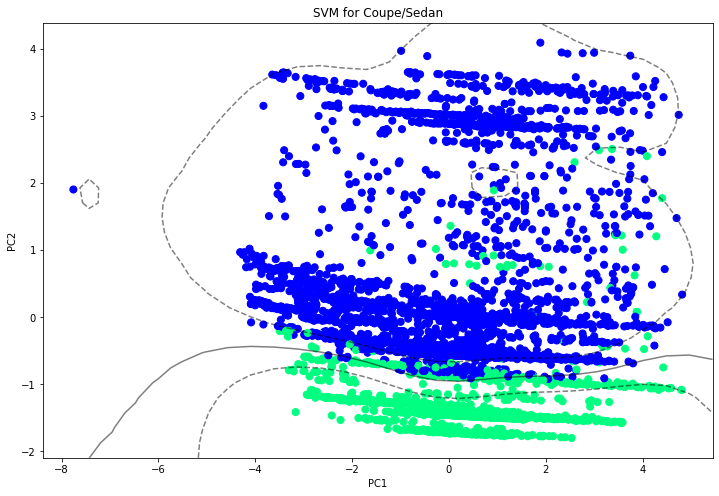

In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVM for Coupe/Sedan')
plt.show()

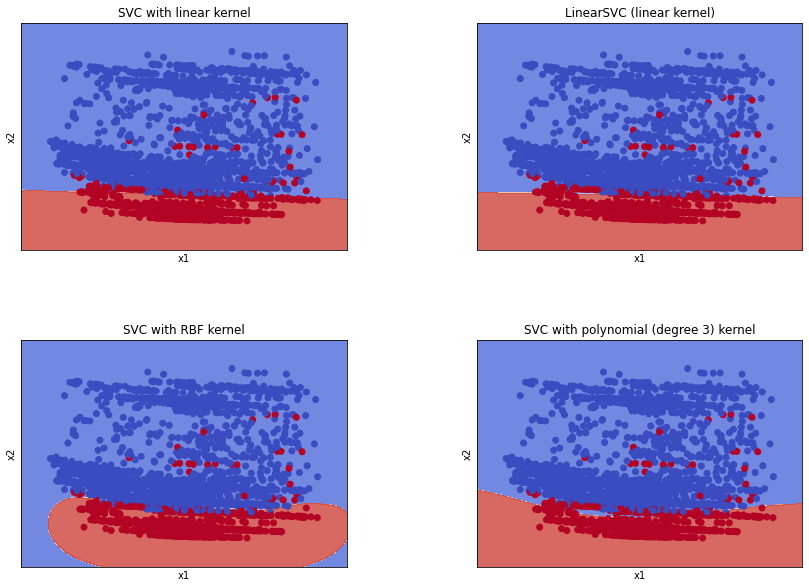

In [10]:
### Plot the decision boundary for SVM with different Kernels
X,y = X_transformed[:,0:2], y
x_train, x_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=N)
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(x_train, y_train)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)
lin_svc = LinearSVC(C=C).fit(x_train, y_train)

# create a mesh to plot in
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(14, 10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve

print("Accuracy of Linear SVC: ", accuracy_score(y_test, lin_svc.predict(x_test)))
print("Accuracy of Polynomial SVC: ", accuracy_score(y_test, poly_svc.predict(x_test)))
print("Accuracy of RBF SVC: ", accuracy_score(y_test, rbf_svc.predict(x_test)))

Accuracy of Linear SVC:  0.95703125
Accuracy of Polynomial SVC:  0.9501953125
Accuracy of RBF SVC:  0.96484375


In [12]:
from sklearn.metrics import roc_curve, auc
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, rbf_svc.predict(x_test))
print("AUC of RBF SVC: ", auc(test_fpr, test_tpr))

AUC of RBF SVC:  0.9475911443489363
